In [11]:
%matplotlib inline
import pandas as pd

In [15]:
titles = pd.read_csv('../dataset/titles.csv')

# faster to calculates such 30s or 50s .)

titles['decades'] = titles['year'] // 10 * 10


titles.head()

,title,year,decades
0,Chatur Singh Two Star,2011,2010
1,Night Train for Inverness,1960,1960
2,Njiur melambai,1951,1950
3,Roya-ye nime-shab-e tabestan,1994,1990
4,Undskyld jeg forstyrrer,2012,2010


In [16]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 3 columns):
title      244914 non-null object
year       244914 non-null int64
decades    244914 non-null int64
dtypes: int64(2), object(1)
memory usage: 5.6+ MB


In [28]:
# %%time
cast = pd.read_csv('../dataset/cast.csv')

cast['decades'] = cast['year'] // 10 * 10

cast.head()

,title,year,name,type,character,n,decades
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,2010
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0,1980
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0,2010
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN,2010
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN,2010


In [18]:
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 7 columns):
title        object
year         int64
name         object
type         object
character    object
n            float64
decades      int64
dtypes: float64(1), int64(2), object(4)
memory usage: 202.2+ MB


In [41]:
%%time

cast[cast.title == 'Sleuth']

CPU times: user 282 ms, sys: 7.71 ms, total: 290 ms
Wall time: 295 ms


,title,year,name,type,character,n,decades
260242,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN,2000
326773,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0,1970
326774,Sleuth,2007,Michael Caine,actor,Andrew,1.0,2000
373876,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0,1970
373877,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN,2000
1293634,Sleuth,2007,Jude Law,actor,Milo,2.0,2000
1448690,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0,1970
1465483,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0,1970
1705394,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0,1970
1805907,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0,2000


In [39]:
# change index. w/o sort
c = cast.set_index(['title'])

c.head()

,year,name,type,character,n,decades
title,,,,,,
Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,2010
Suuri illusioni,1985,Homo $,actor,Guests,22.0,1980
Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0,2010
Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN,2010
Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN,2010


In [40]:
%%time
c.loc['Sleuth']

# 132 ms vs 298ms (at line 37) !!

CPU times: user 1.43 s, sys: 20.2 ms, total: 1.45 s
Wall time: 1.44 s


,year,name,type,character,n,decades
title,,,,,,
Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN,2000
Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0,1970
Sleuth,2007,Michael Caine,actor,Andrew,1.0,2000
Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0,1970
Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN,2000
Sleuth,2007,Jude Law,actor,Milo,2.0,2000
Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0,1970
Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0,1970
Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0,1970


In [42]:
# change index. w/ sort
c = cast.set_index(['title']).sort_index()

c.head()

# ways - 
# 1. cast[cast.title == 'Sleuth']  w/ default index
# 2. c.loc['Sleuth'] w/ index on title, w/o sorting
# 3. c.loc['Sleuth'] w/ index on title, w sorting (initial investing for index build, than much faster)
#
# - indexing takes time ()
# - firts query after index. takes time
# - then it is much faster

,year,name,type,character,n,decades
title,,,,,,
#1 Serial Killer,2013,Parry Shen,actor,Murder Victim,NaN,2010
#1 Serial Killer,2013,Zachary (X) Brown,actor,Africian American Teen,18.0,2010
#1 Serial Killer,2013,Eric (II) St. John,actor,Officer Williams,NaN,2010
#1 Serial Killer,2013,Jinxia Ma,actress,Chinese Teacher,24.0,2010
#1 Serial Killer,2013,Gemma Massot,actress,Betty Goodman,7.0,2010


In [49]:
%%time
# cast[cast.title == 'Sleuth']
c.loc['Sleuth']

# 132 ms vs 298ms (default index) !!

CPU times: user 477 µs, sys: 35 µs, total: 512 µs
Wall time: 487 µs


,year,name,type,character,n,decades
title,,,,,,
Sleuth,2007,Eve (II) Channing,actress,Marguerite Wyke,NaN,2000
Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0,1970
Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0,1970
Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN,2000
Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0,2000
Sleuth,2007,Michael Caine,actor,Andrew,1.0,2000
Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0,1970
Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN,2000
Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0,1970


In [51]:
%%time
# change index. w sort
k = cast.set_index(['title', 'year']).sort_index()

k.head()

CPU times: user 8.33 s, sys: 222 ms, total: 8.55 s
Wall time: 7.91 s


In [54]:
k.head(100)

# contains title + year
# and if we loc['title'], year remains still as index

name     type  \
title                 year                                         
#1 Serial Killer      2013                Michael Alton    actor   
                      2013                   Aaron Aoki    actor   
                      2013            Zachary (X) Brown    actor   
                      2013               Yvis Cannavale    actor   
                      2013                Patrick Chien    actor   
                      2013              Matthias Chrans    actor   
                      2013              Robert Cicchini    actor   
                      2013               Scott Eriksson    actor   
                      2013                 Rane Jameson    actor   
                      2013                       Tzi Ma    actor   
                      2013               Thomas McCurdy    actor   
                      2013         Thomas Isao Morinaka    actor   
                      2013                   Parry Shen    actor   
                      2013           Eric (II) St. John    actor   
                      2013              Brian Takahashi    actor   
                      2013                  Timothy Tau    actor   
                      2013                  Jason Tobin    actor   
                      2013                   Jesse Wang    actor   
                      2013              Romina Bovolini  actress   
                      2013                Shoshana Bush  actress   
                      2013               Kasie Callaway  actress   
                      2013                   Tiley Chao  actress   
                      2013                  Cindera Che  actress   
                      2013                Kylee Cochran  actress   
                      2013                Kenzie Dalton  actress   
                      2013              Christie Gaynor  actress   
                      2013                Ellen (II) Ho  actress   
                      2013                    Jinxia Ma  actress   
                      2013                 Gemma Massot  actress   
                      2013                 Eugenia Yuan  actress   
...                                                 ...      ...   
#50Fathers            2015           Sonia (III) Bishop  actress   
                      2015              Tatiana Capeles  actress   
                      2015                Aisha Hoskins  actress   
                      2015          Morgan (XXIV) Jones  actress   
                      2015              Grace Mannarino  actress   
                      2015         Rebecca (III) Morris  actress   
                      2015         Kalicia Elaine Perry  actress   
                      2015                Donzella Turk  actress   
                      2015           Megan Jones Turner  actress   
                      2015               Shanavia Young  actress   
#66                   2015             Ari Riski Ananda    actor   
                      2015                Erwin Bagindo    actor   
                      2015              Fandy Christian    actor   
                      2015              Franki Darmawan    actor   
                      2015                Yanda Djaitov    actor   
                      2015  Hendra Louis Alexander Eman    actor   
                      2015                  Ali Nurkoto    actor   
                      2015             Joshua Pandelaki    actor   
                      2015                  Aji Setiaji    actor   
                      2015             Ricardo Silenzie    actor   
                      2015                   Ali Syehan    actor   
                      2015               Yayu A.W. Unru    actor   
                      2015                 Donita (III)  actress   
                      2015                 Asun Mawardi  actress   
#73, Shaanthi Nivaasa 2007                  Ramesh Bhat    actor   
                      2007                  Deepu (III)    actor   
                      2007            M

In [55]:
k.loc['Sleuth']

,name,type,character,n,decades
year,,,,,
1972,Michael Caine,actor,Milo Tindle,2.0,1970
1972,Alec Cawthorne,actor,Inspector Doppler,3.0,1970
1972,Teddy Martin,actor,Police Constable Higgs,6.0,1970
1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0,1970
1972,Laurence Olivier,actor,Andrew Wyke,1.0,1970
1972,Eve (III) Channing,actress,Marguerite Wyke,5.0,1970
2007,Kenneth Branagh,actor,Other Man on T.V.,NaN,2000
2007,Michael Caine,actor,Andrew,1.0,2000
2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN,2000


In [81]:
%%time
# k.loc['Sleuth'].loc['2007']    #1.53ms
k.loc[('Sleuth', 2007)]         # 1ms

CPU times: user 964 µs, sys: 107 µs, total: 1.07 ms
Wall time: 1.01 ms


name     type          character    n  decades
title  year                                                               
Sleuth 2007      Kenneth Branagh    actor  Other Man on T.V.  NaN     2000
       2007        Michael Caine    actor             Andrew  1.0     2000
       2007  Alec (II) Cawthorne    actor  Inspector Doppler  NaN     2000
       2007             Jude Law    actor               Milo  2.0     2000
       2007        Harold Pinter    actor        Man on T.V.  3.0     2000
       2007    Eve (II) Channing  actress    Marguerite Wyke  NaN     2000
       2007    Carmel O'Sullivan  actress             Maggie  NaN     2000

In [78]:
k.loc['Sleuth'].decades.value_counts()

2000    7
1970    6
Name: decades, dtype: int64

In [87]:
k.loc['Sleuth'].reset_index('year')

# so year becomes data again !!

,year,name,type,character,n,decades
0,1972,Michael Caine,actor,Milo Tindle,2.0,1970
1,1972,Alec Cawthorne,actor,Inspector Doppler,3.0,1970
2,1972,Teddy Martin,actor,Police Constable Higgs,6.0,1970
3,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0,1970
4,1972,Laurence Olivier,actor,Andrew Wyke,1.0,1970
5,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0,1970
6,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN,2000
7,2007,Michael Caine,actor,Andrew,1.0,2000
8,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN,2000
9,2007,Jude Law,actor,Milo,2.0,2000


### groupby ( adifferent approach to indexing)


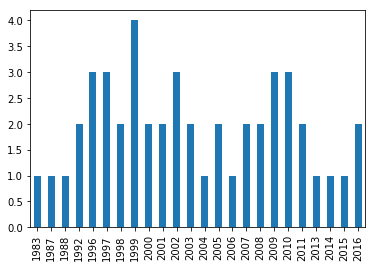

In [103]:
o = cast[cast.name == 'George Clooney']


o.year.value_counts().sort_index().plot(kind='bar')  # same results like groupby below

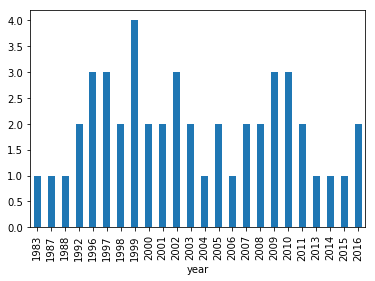

In [104]:
m = cast

m = m[m.name == 'George Clooney']

m.groupby(['year']).size().plot(kind='bar')


In [106]:
m.groupby(['title', 'year']).size().head(10)

title                            year
Batman & Robin                   1997    2
Burn After Reading               2008    1
Confessions of a Dangerous Mind  2002    1
Curdled                          1996    1
Fantastic Mr. Fox                2009    1
From Dusk Till Dawn              1996    1
Good Night, and Good Luck.       2005    1
Gravity                          2013    1
Grizzly II: The Concert          1983    1
Hail, Caesar!                    2016    1
dtype: int64

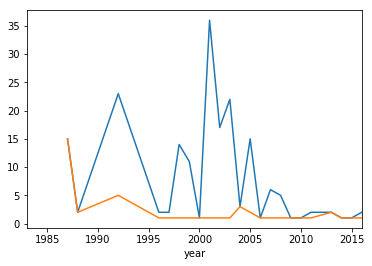

In [112]:
x = m.groupby(['year'])

a = x.n.max().sort_index().plot()
b = x.n.min().sort_index().plot()


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

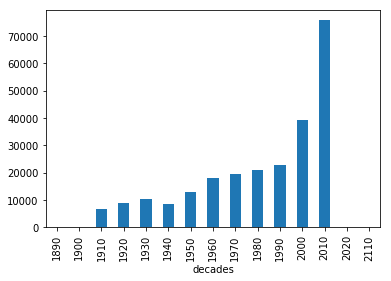

In [127]:
num_of_movies = titles.groupby(['decades']).size()

num_of_movies.plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

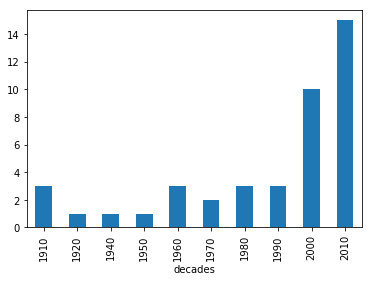

In [132]:
num_of_hamlet = titles[titles.title.str.startswith('Hamlet')].groupby(['decades']).size()

num_of_hamlet.plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [154]:
# %%time
roles_by_gender = cast[(cast.decades == 1950) & (cast.n == 1)].groupby(['year','type']).size()

roles_by_gender

year  type   
1950  actor      625
      actress    288
1951  actor      651
      actress    285
1952  actor      613
      actress    304
1953  actor      664
      actress    312
1954  actor      636
      actress    316
1955  actor      648
      actress    285
1956  actor      668
      actress    307
1957  actor      739
      actress    315
1958  actor      715
      actress    301
1959  actor      733
      actress    327
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [157]:
roles_by_gender_n = cast[(cast.decades == 1950) & (cast.n <=5)].groupby(['type', 'n']).size()

roles_by_gender_n

type     n  
actor    1.0    6692
         2.0    4640
         3.0    5654
         4.0    5663
         5.0    5674
actress  1.0    3040
         2.0    4635
         3.0    3201
         4.0    2881
         5.0    2592
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [175]:
roles_of_pink_panther = cast[cast.title == 'The Pink Panther'].sort_values('n').groupby(['year'])[['n']].max()

roles_of_pink_panther

,n
year,
1963,15.0
2006,50.0


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [184]:
roles_of_frankoz = cast[cast.name == 'Frank Oz'].groupby(['year', 'title']).size()

roles_of_frankoz[roles_of_frankoz > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [185]:
characters_of_frankoz = cast[cast.name == 'Frank Oz'].groupby(['character']).size()

characters_of_frankoz[characters_of_frankoz > 1]

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64